# Стратегия покупки/продажи биткоина с двумя скользящими средними

## SMA30 - скользящее среднее с окном в 30 дней
## SMA90 - скользящее среднее с окном в 90 дней
### Суть стратегии:
### - "короткая" скользящая пробивает "длинную" сверху вниз, цена падает, нужно продавать
### - "короткая" скользящая пробивает "длинную" снизу вверх, цена растет, нужно покупать

In [9]:
# загружаем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') # выбираем стиль графиков

In [10]:
# указываем путь к датасету
bitcoin_dataset_path = 'https://raw.githubusercontent.com/alexanderkushkovoy/V3_Bitcoin_Data.csv/main/V3_Bitcoin_Data.csv'
# считываем датасет по указанному пути
bitcoin_dataset = pd.read_csv(bitcoin_dataset_path)

In [11]:
# проверяем все ли правильно считалось
bitcoin_dataset.head()

,Date,Open,High,Low,Close,Volume,Market Cap,MA(20),MA(50),MA(200),RSI(14)(SMA)
0,Jan-01-2017,998.325,1031.39,996.702,1021.790,187143686.4,1.634320e+10,878.471095,802.475235,678.050980,87.161234
1,Jan-02-2017,1021.750,1044.08,1021.600,1044.080,196321881.9,1.655206e+10,890.970952,809.180980,679.433716,87.716503
2,Jan-03-2017,1043.840,1159.42,1043.840,1153.540,236739191.0,1.755862e+10,908.701333,817.983922,681.444597,90.126292
3,Jan-04-2017,1154.730,1191.10,910.417,1010.620,431154142.4,1.728391e+10,919.764667,823.846686,682.708960,64.270427
4,Jan-05-2017,1013.380,1046.81,883.944,902.201,437660606.3,1.521549e+10,925.350191,826.943843,683.399597,48.287423


In [12]:
# проверяем типы данных
bitcoin_dataset.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Market Cap      float64
MA(20)          float64
MA(50)          float64
MA(200)         float64
RSI(14)(SMA)    float64
dtype: object

In [13]:
# Колонка "Date" имеет тип object, преобразуем её в datetime
bitcoin_dataset['Date'] = pd.to_datetime(bitcoin_dataset['Date'])

In [14]:
# проверяем результат преобразований типа в колонке Date
bitcoin_dataset.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Market Cap             float64
MA(20)                 float64
MA(50)                 float64
MA(200)                float64
RSI(14)(SMA)           float64
dtype: object

In [15]:
# и еще раз визуально
bitcoin_dataset

,Date,Open,High,Low,Close,Volume,Market Cap,MA(20),MA(50),MA(200),RSI(14)(SMA)
0,2017-01-01,998.32500,1031.39000,996.70200,1021.79000,1.871437e+08,1.634320e+10,878.471095,802.475235,678.050980,87.161234
1,2017-01-02,1021.75000,1044.08000,1021.60000,1044.08000,1.963219e+08,1.655206e+10,890.970952,809.180980,679.433716,87.716503
2,2017-01-03,1043.84000,1159.42000,1043.84000,1153.54000,2.367392e+08,1.755862e+10,908.701333,817.983922,681.444597,90.126292
3,2017-01-04,1154.73000,1191.10000,910.41700,1010.62000,4.311541e+08,1.728391e+10,919.764667,823.846686,682.708960,64.270427
4,2017-01-05,1013.38000,1046.81000,883.94400,902.20100,4.376606e+08,1.521549e+10,925.350191,826.943843,683.399597,48.287423
...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,50667.98834,50667.98834,47411.71724,47637.88840,5.939821e+10,9.240000e+11,48669.217350,54402.326730,47641.084510,46.793880
1822,2021-12-28,47547.86550,48112.02147,46272.66298,46408.30267,8.826973e+10,9.000000e+11,48475.745240,53988.763550,47686.895220,40.596736
1823,2021-12-29,46430.48122,47876.49184,46077.72228,47161.00920,1.230000e+11,8.910000e+11,48443.650720,53601.463010,47744.719640,47.776097
1824,2021-12-30,47139.35900,48505.99970,45712.56659,46304.94959,7.810027e+10,8.950000e+11,48406.156380,53237.417870,47781.112430,49.998397


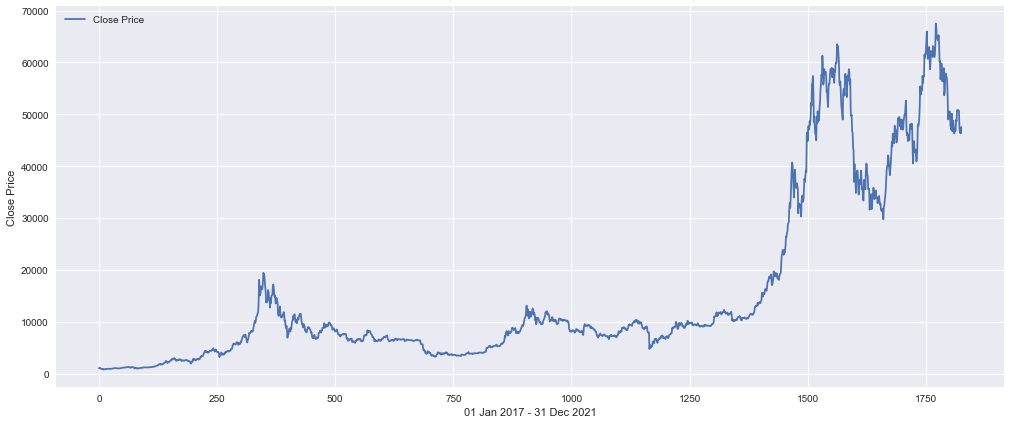

In [16]:
# построим график изменения цены
# зададим размер графика
plt.figure(figsize = (17,7))
# выбираем из датасета колонку Close, добавляем метку "Close Price"
plt.plot(bitcoin_dataset['Close'], label = 'Close Price')
# по оси X расположим данные из колонки Date
plt.xlabel('01 Jan 2017 - 31 Dec 2021')
# по оси Y расположим данные из Close Price
plt.ylabel('Close Price')
# добавим графику легенду, расположим её в верхнем левом углу
plt.legend(loc = 'upper left')
# выводим график
plt.show()

In [17]:
# теперь создадим две скользящие средние
# используем данные из колонки Close
# создаем пустой датафрейм для 30-тидневной скользящей
sma30 = pd.DataFrame()
# добавляем в датафрейм колонку Close Price
# данные для колонки берем из датасета, исползуем метод rolling и среднеарифметическое mean
sma30['Close Price'] = bitcoin_dataset['Close'].rolling(window = 30).mean()
# аналогично делаем для 90-тидневной скользящей
sma90 = pd.DataFrame()
sma90['Close Price'] = bitcoin_dataset['Close'].rolling(window = 90).mean()

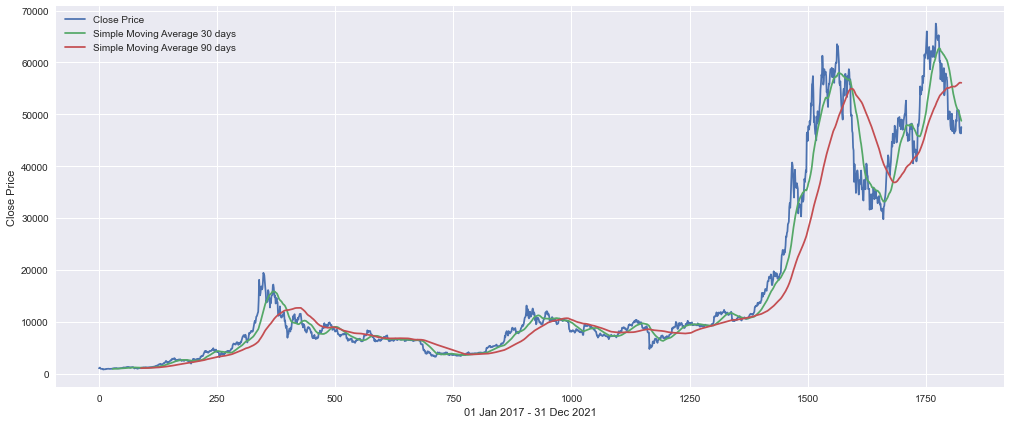

In [18]:
# отобразим скользящие на графике
# используем уже написанный ранне код для отображения графика
plt.figure(figsize = (17,7))
plt.plot(bitcoin_dataset['Close'], label = 'Close Price')
# довавим отображение 30-тидневной скользящей
plt.plot(sma30['Close Price'], label = 'Simple Moving Average 30 days')
# довавим отображение 90-тидневной скользящей
plt.plot(sma90['Close Price'], label = 'Simple Moving Average 90 days')
plt.xlabel('01 Jan 2017 - 31 Dec 2021')
plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()

In [19]:
# создаем новый датафрейм
df = pd.DataFrame()
# создаем новую колонку, переносим в нее данные из колонки Date датасета bitcoin
df['Date'] = bitcoin_dataset['Date']
# создаем новую колонку, переносим в нее данные из колонки Close датасета bitcoin
df['Close Price'] = bitcoin_dataset['Close']
# создаем новую колонку, переносим в нее данные из колонки Close Price датафрейма sma30
df['SMA30'] = sma30['Close Price']
# создаем новую колонку, переносим в нее данные из колонки Close Price датафрейма sma90
df['SMA90'] = sma90['Close Price']
# посмотрим что получилось
df

,Date,Close Price,SMA30,SMA90
0,2017-01-01,1021.79000,NaN,NaN
1,2017-01-02,1044.08000,NaN,NaN
2,2017-01-03,1153.54000,NaN,NaN
3,2017-01-04,1010.62000,NaN,NaN
4,2017-01-05,902.20100,NaN,NaN
...,...,...,...,...
1821,2021-12-27,47637.88840,50116.420993,56078.922172
1822,2021-12-28,46408.30267,49734.147941,56107.930066
1823,2021-12-29,47161.00920,49405.177392,56097.714915
1824,2021-12-30,46304.94959,49042.906395,56082.097516


### отстутствие данных в начальных строках колонок SMA30 и SMA90 логичны, т.к. окна для скользящих заданы в 30 и 90 дней и данные появятся на 30 и 90 строке соответственно

### напишем функцию используя следующий алгоритм. Если SMA30 пересекает SMA90 и далее движется вниз, то до точки пересечения SMA30 будет больше SMA 90, а после точки пересечения меньше. И наоборот, если SMA30 пересекает SMA 90 и движется вверх, то сначала она меньше, а затем больше. Используем переменную, которая будет выступать флагом и принимать следующие значения:
### - значение "-1", т.е. SMA30 стало меньше SMA90, цена падает, нужно продавать;
### - значение "1", т.е. SMA30 стало больше SMA90, цена растет, нужно покупать;
### - значение "0", пересечения не было, ничего не делаем.

In [20]:
# зададим функцию, которая будет возвращать сигнал для покупки/продажи
def sma_signal(df): # в качестве аргумента функция использует созданный датафрейм df
    # создадим два пустых листа. в которые алгоритм будем записывать цены, когда нужно подать сигнал к действию
    price_to_buy = []
    price_to_sell = []
    # создадим переменную флаг, которая будет принимать три ранее описанных значения
    # предполагаем что пока изменений не было, поэтому значение 0
    flag = 0

    # пройдемся по каждому элементу аргумента функции df
    for i in range(len(df)):
        # если i-тый элемент колонки SMA30 больше i-того элемента колонки SMA90
        # рассматриваем ситуацию когда SMA30 пересекает SMA90 снизу вверх
        if df['SMA30'][i] > df['SMA90'][i]:
            # проверяем условие равен ли наш флаг 1, было ли уже пробитие?
            if flag != 1:
                # если флаг не равен 1, то SMA30 пробила вверх SMA90, нужно записать значение цены для покупки
                price_to_buy.append(df['Close Price'][i])
                # в price_to_sell при этом записываем пустое значение
                price_to_sell.append(np.nan)
                # флаг ставим 1
                flag = 1

            # в обратном случае в колонки заносим пустые значения, т.е. ничего не меняем
            else:
                price_to_buy.append(np.nan)
                price_to_sell.append(np.nan)

        # рассматриваем ситуацию когда SMA30 пересекает SMA90 сверху вниз
        elif df['SMA30'][i] < df['SMA90'][i]:
            # проверяем условие равен ли наш флаг -1, было ли уже пробитие?
            if flag != -1:
                # если флаг не равен -1, то SMA30 пробила вниз SMA90, нужно записать значение цены для продажи
                price_to_sell.append(df['Close Price'][i])
                # в price_to_buy при этом записываем пустое значение
                price_to_buy.append(np.nan)
                # флаг ставим -1
                flag = -1
            # в обратном случае в колонки заносим пустые значения, т.е. ничего не меняем
            else:
                price_to_buy.append(np.nan)
                price_to_sell.append(np.nan)

        # если SMA 30 не пересекает SM90, т.е. боковой тренд, то записываем пустые значения
        else:
            price_to_buy.append(np.nan)
            price_to_sell.append(np.nan)

    # возвращаем результат функции
    return(price_to_buy, price_to_sell)

In [21]:
# создадим новый элемент, в который запишем результат функции sma_signal
sma_signal = sma_signal(df)

In [22]:
# добавляем в датафрейм df колонку Signal To Buy, данные для нее берем из нулевой колонки sma_signal (она же price_to_buy)
df['Signal To Buy'] = sma_signal[0]
# добавляем в датафрейм df колонку Signal To Sell, данные для нее берем из первой колонки sma_signal (она же price_to_sell)
df['Signal To Sell'] = sma_signal[1]

In [23]:
# смотрим что получилось в df
df

,Date,Close Price,SMA30,SMA90,Signal To Buy,Signal To Sell
0,2017-01-01,1021.79000,NaN,NaN,NaN,NaN
1,2017-01-02,1044.08000,NaN,NaN,NaN,NaN
2,2017-01-03,1153.54000,NaN,NaN,NaN,NaN
3,2017-01-04,1010.62000,NaN,NaN,NaN,NaN
4,2017-01-05,902.20100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1821,2021-12-27,47637.88840,50116.420993,56078.922172,NaN,NaN
1822,2021-12-28,46408.30267,49734.147941,56107.930066,NaN,NaN
1823,2021-12-29,47161.00920,49405.177392,56097.714915,NaN,NaN
1824,2021-12-30,46304.94959,49042.906395,56082.097516,NaN,NaN


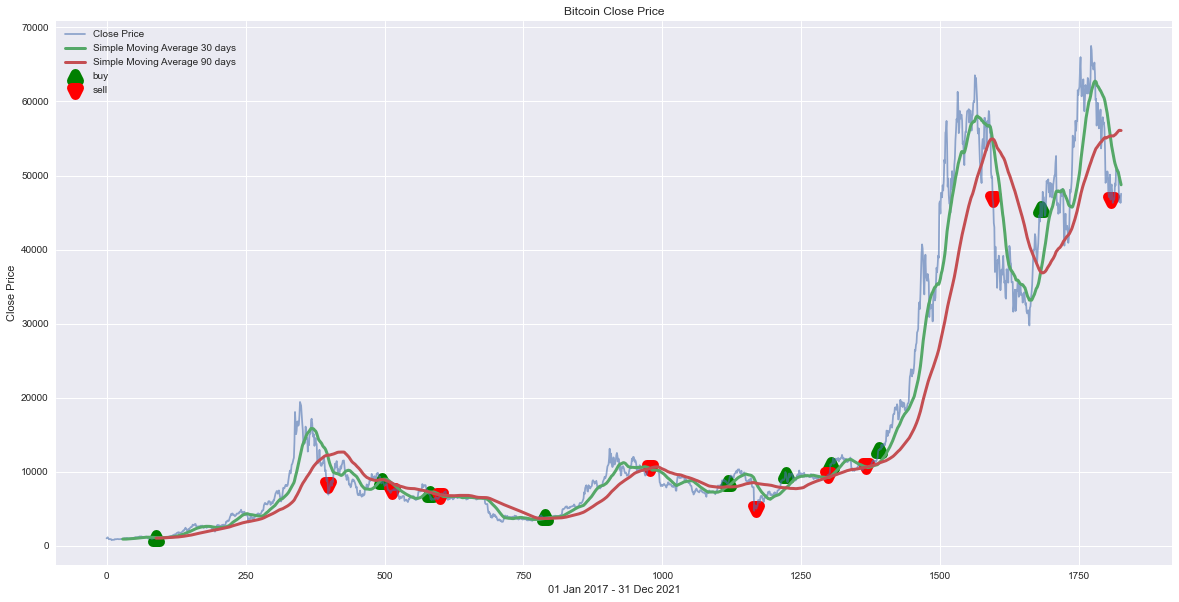

In [24]:
# создадим новый график использу код предыдущего с дополнениями
plt.figure(figsize = (20,10))
plt.plot(bitcoin_dataset['Close'], label = 'Close Price', alpha = 0.6)
plt.plot(sma30['Close Price'], label = 'Simple Moving Average 30 days', linewidth = 3)
plt.plot(sma90['Close Price'], label = 'Simple Moving Average 90 days', linewidth = 3)
# добавим значок зеленого цвета для отображения сигнала к покупке в виде стрелки вверх
plt.scatter(df.index, df['Signal To Buy'],
            label = 'buy',
            color = 'green',
            marker = '^',
            linewidth = 10)
# добавим значок красного цвета для отображения сигнала к продаже в виде стрелки вниз
plt.scatter(df.index, df['Signal To Sell'],
            label = 'sell',
            color = 'red',
            marker = 'v',
            linewidth = 10)
# добавим название для графика
plt.title('Bitcoin Close Price')
plt.xlabel('01 Jan 2017 - 31 Dec 2021')
plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()